In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

_Analyse microstructure des mouvements de prix du Nasdaq100 \- Version 2_ 


In [2]:
J = pd.read_excel('6EDJUILLET.xlsx')
J['time'] = pd.to_datetime(J['time'], format='%H:%M:%S').dt.time
J['time_str'] = J['time'].astype(str) # Convertir time en chaînes de caractères
J.head()

,time,open1,high1,low1,close1,volume1,open2,high2,low2,close2,...,high10,low10,close10,volume10,open11,high11,low11,close11,volume11,time_str
0,09:30:00,20610.00,20623.25,20606.50,20619.75,4844,20649.25,20656.50,20634.00,20637.75,...,19166.25,19119.75,19134.0,6380,19285.25,19292.75,19254.75,19254.75,6008,09:30:00
1,09:31:00,20620.25,20627.75,20600.75,20621.00,4513,20637.00,20644.00,20631.00,20642.25,...,19142.00,19117.00,19126.5,3388,19254.50,19263.25,19231.75,19232.25,5160,09:31:00
2,09:32:00,20621.25,20627.00,20606.00,20611.00,3852,20642.25,20662.75,20642.25,20646.00,...,19155.00,19124.25,19147.0,3425,19232.75,19264.75,19222.00,19262.50,4530,09:32:00
3,09:33:00,20610.75,20638.00,20607.75,20634.75,3975,20645.50,20649.75,20632.00,20646.00,...,19151.25,19112.50,19112.5,3103,19262.50,19285.75,19251.50,19264.25,4470,09:33:00
4,09:34:00,20634.75,20640.25,20621.50,20627.50,3085,20646.50,20671.50,20646.50,20665.75,...,19118.00,19088.25,19097.5,4314,19264.25,19286.75,19256.00,19258.75,3602,09:34:00


Petit rappel : 

- Close1 : correspond au prix de clôture pour la journée du 15/07 \(lundi\)
- Close2 : correspond au prix de clôture pour la journée du 16/07 \(mardi\)
- Close3 : correspond au prix de clôture pour la journée du 17/07 \(mercredi\)
- Close4 : correspond au prix de clôture pour la journée du 18/07 \(jeudi\)
- Close5 : correspond au prix de clôture pour la journée du 19/07 \(vendredi\)  
- Close6 : correspond au prix de clôture pour la journée du 22/07 \(lundi\)
- Close7 : correspond au prix de clôture pour la journée du 23/07 \(mardi\)
- Close8 : correspond au prix de clôture pour la journée du 24/07 \(mercredi\)
- Close9 : correspond au prix de clôture pour la journée du 25/07 \(jeudi\)
- Close10 : correspond au prix de clôture pour la journée du 26/07 \(vendredi\)
- Close11 : correspond au prix de clôture pour la journée du 29/07 \(lundi\)

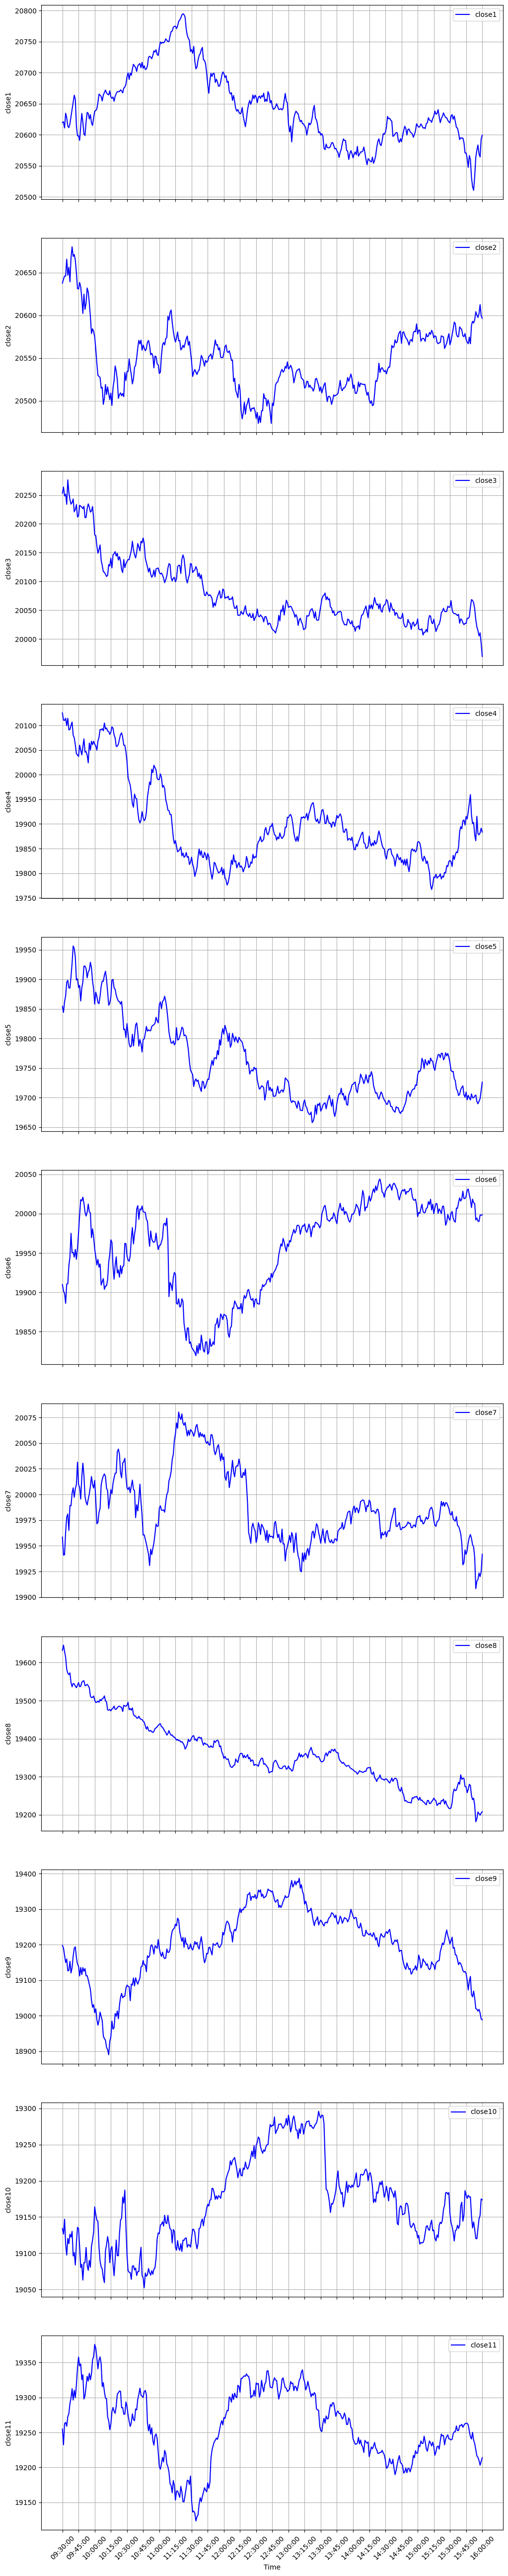

In [3]:
# Plot

close_columns = [col for col in J.columns if 'close' in col]

time_labels = J['time_str'][::15]

# Plot each 'close' column over time with improved x-axis labeling
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(J['time_str'], J[col], label=col, color = 'blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)
    ax.set_xticks(time_labels.index)
    ax.set_xticklabels(time_labels)

# Set x-axis label for the last subplot
axes[-1].set_xlabel('Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [4]:
# Statistiques descriptives 

# Initialize a dictionary to store descriptive statistics for each 'close' column
descriptive_stats = {}

# Loop through each 'close' column and calculate descriptive statistics
for col in close_columns:
    descriptive_stats[col] = J[col].describe()

# Convert the dictionary to a DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats)
print(descriptive_stats_df)

             close1        close2        close3        close4        close5  \
count    391.000000    391.000000    391.000000    391.000000    391.000000   
mean   20643.143223  20548.343350  20079.930307  19900.442455  19762.037084   
std       57.811256     39.334426     60.811582     89.140696     69.785904   
min    20510.500000  20473.500000  19969.500000  19767.000000  19657.750000   
25%    20601.375000  20518.375000  20036.875000  19833.000000  19705.750000   
50%    20632.500000  20545.000000  20055.250000  19875.250000  19743.750000   
75%    20672.250000  20572.625000  20115.875000  19927.375000  19807.250000   
max    20795.000000  20680.250000  20276.500000  20125.250000  19956.250000   

             close6        close7        close8        close9       close10  \
count    391.000000    391.000000    391.000000    391.000000    391.000000   
mean   19959.264066  19987.571611  19361.902813  19196.224425  19168.515345   
std       59.811181     35.669067     92.466462    

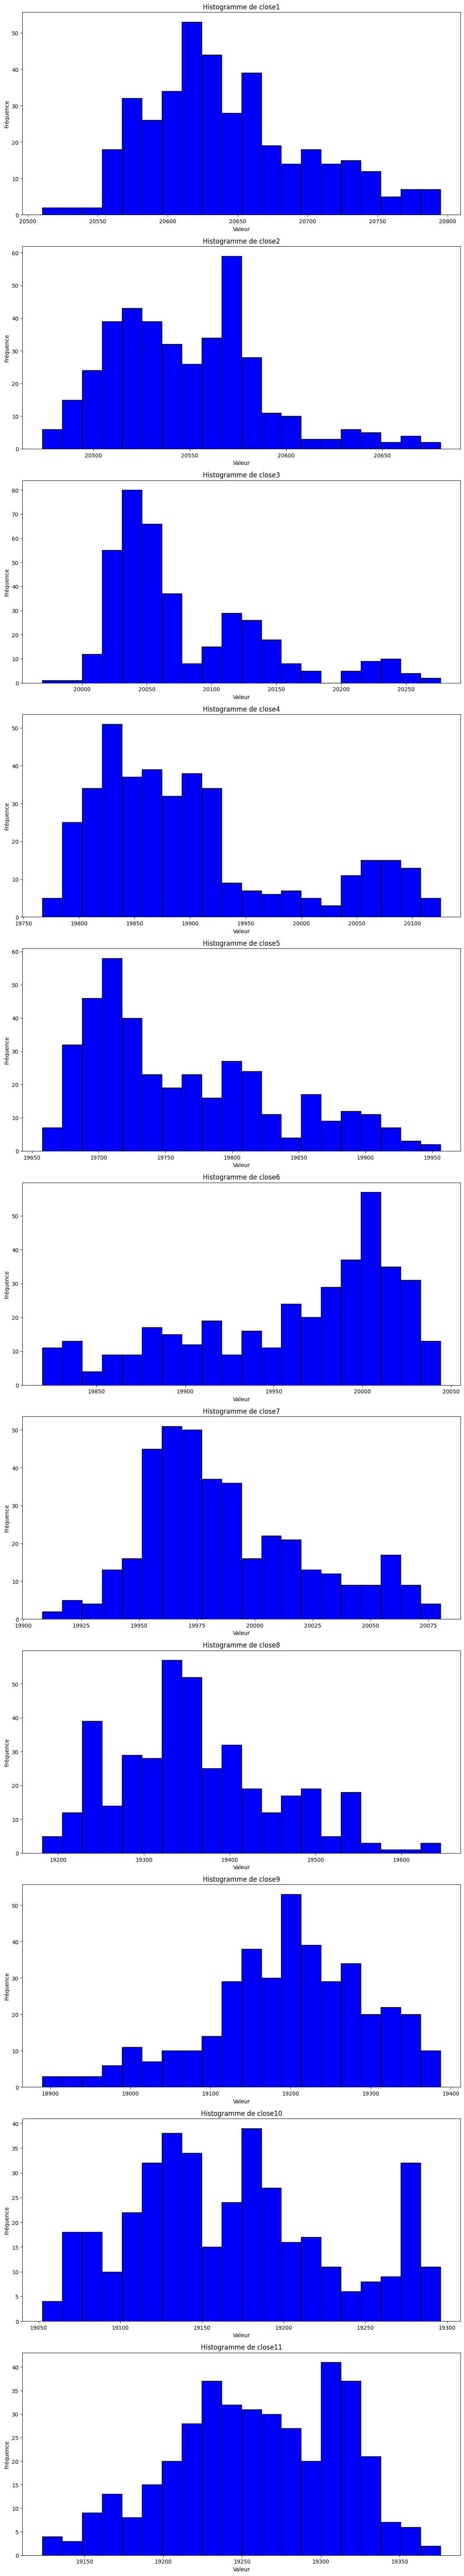

In [5]:
# Histogramme 

fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)))

for ax, col in zip(axes, close_columns):
    ax.hist(J[col], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'Histogramme de {col}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [6]:
# Filtrer les données entre 9:30 et 10:00 - Open Market
start_time = pd.to_datetime('09:30:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('10:00:00', format='%H:%M:%S').time()

filtered_data = J[(J['time'] >= start_time) & (J['time'] <= end_time)]

# Définir les colonnes 'close' retenu pour l'analyse
close_columns = [col for col in J.columns if 'close' in col]

# Calcule des statistiques descriptives pour les données filtrées
for col in close_columns:
    stats = filtered_data[col].describe()
    print(f"Statistiques descriptives pour {col} de 9:30 à 10:00:")
    print(stats)
    print("\n")

Statistiques descriptives pour close1 de 9:30 à 10:00:
count       31.000000
mean     20623.233871
std         17.263996
min      20591.000000
25%      20613.750000
50%      20621.000000
75%      20634.375000
max      20663.750000
Name: close1, dtype: float64


Statistiques descriptives pour close2 de 9:30 à 10:00:
count       31.000000
mean     20631.491935
std         28.792540
min      20574.750000
25%      20614.500000
50%      20633.250000
75%      20648.375000
max      20680.250000
Name: close2, dtype: float64


Statistiques descriptives pour close3 de 9:30 à 10:00:
count       31.000000
mean     20231.258065
std         18.359430
min      20180.750000
25%      20221.750000
50%      20230.500000
75%      20239.625000
max      20276.500000
Name: close3, dtype: float64


Statistiques descriptives pour close4 de 9:30 à 10:00:
count       31.000000
mean     20071.169355
std         28.012229
min      20024.000000
25%      20048.500000
50%      20064.250000
75%      20095.625000
max  

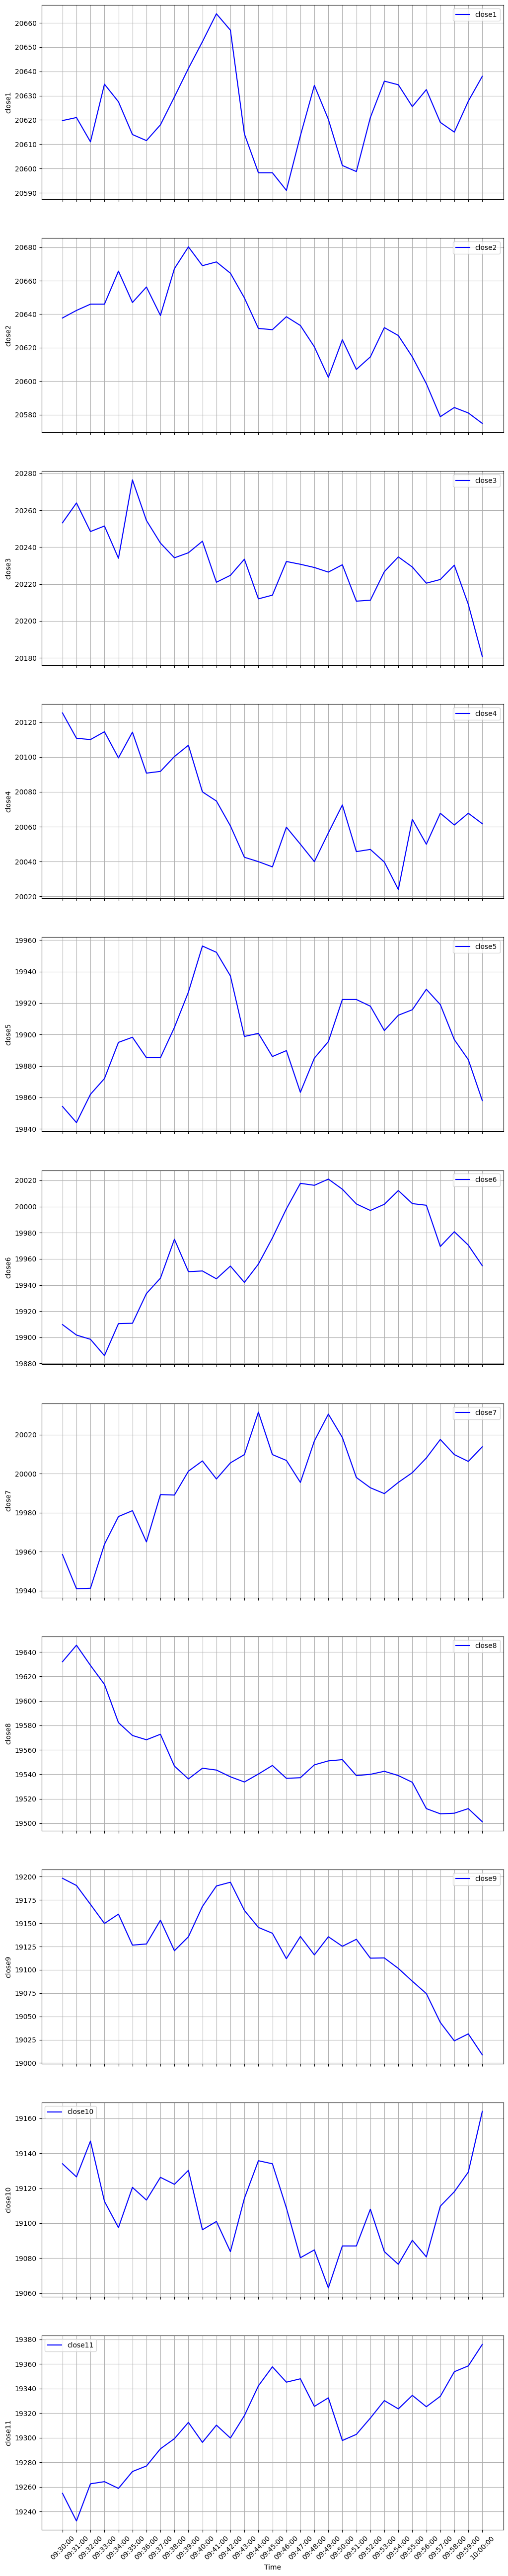

In [7]:
# Plot 

# Plot Close pour les 30 premières minutes
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(filtered_data['time'].astype(str), filtered_data[col], label=col, color='blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel('Time')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Même analyse pour les 30 dernières minutes du marchés 

# Filtrer les données entre 15:30 et 16:00
start_time = pd.to_datetime('15:30:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('16:00:00', format='%H:%M:%S').time()

filtered_data = J[(J['time'] >= start_time) & (J['time'] <= end_time)]

In [9]:
# Statistiques descriptives 

# Définir les colonnes 'close'
close_columns = [col for col in J.columns if 'close' in col]

# Calculer les statistiques descriptives pour les données filtrées
for col in close_columns:
    stats = filtered_data[col].describe()
    print(f"Statistiques descriptives pour {col} de 15:30 à 16:00:")
    print(stats)
    print("\n")

Statistiques descriptives pour close1 de 15:30 à 16:00:
count       31.000000
mean     20582.774194
std         33.121264
min      20510.500000
25%      20564.000000
50%      20587.750000
75%      20607.000000
max      20632.500000
Name: close1, dtype: float64


Statistiques descriptives pour close2 de 15:30 à 16:00:
count       31.000000
mean     20584.500000
std         12.629496
min      20565.500000
25%      20575.000000
50%      20584.000000
75%      20593.875000
max      20612.500000
Name: close2, dtype: float64


Statistiques descriptives pour close3 de 15:30 à 16:00:
count       31.000000
mean     20035.266129
std         21.783780
min      19969.500000
25%      20026.875000
50%      20035.750000
75%      20048.000000
max      20068.250000
Name: close3, dtype: float64


Statistiques descriptives pour close4 de 15:30 à 16:00:
count       31.000000
mean     19881.677419
std         36.923581
min      19813.750000
25%      19848.375000
50%      19884.250000
75%      19907.125000
m

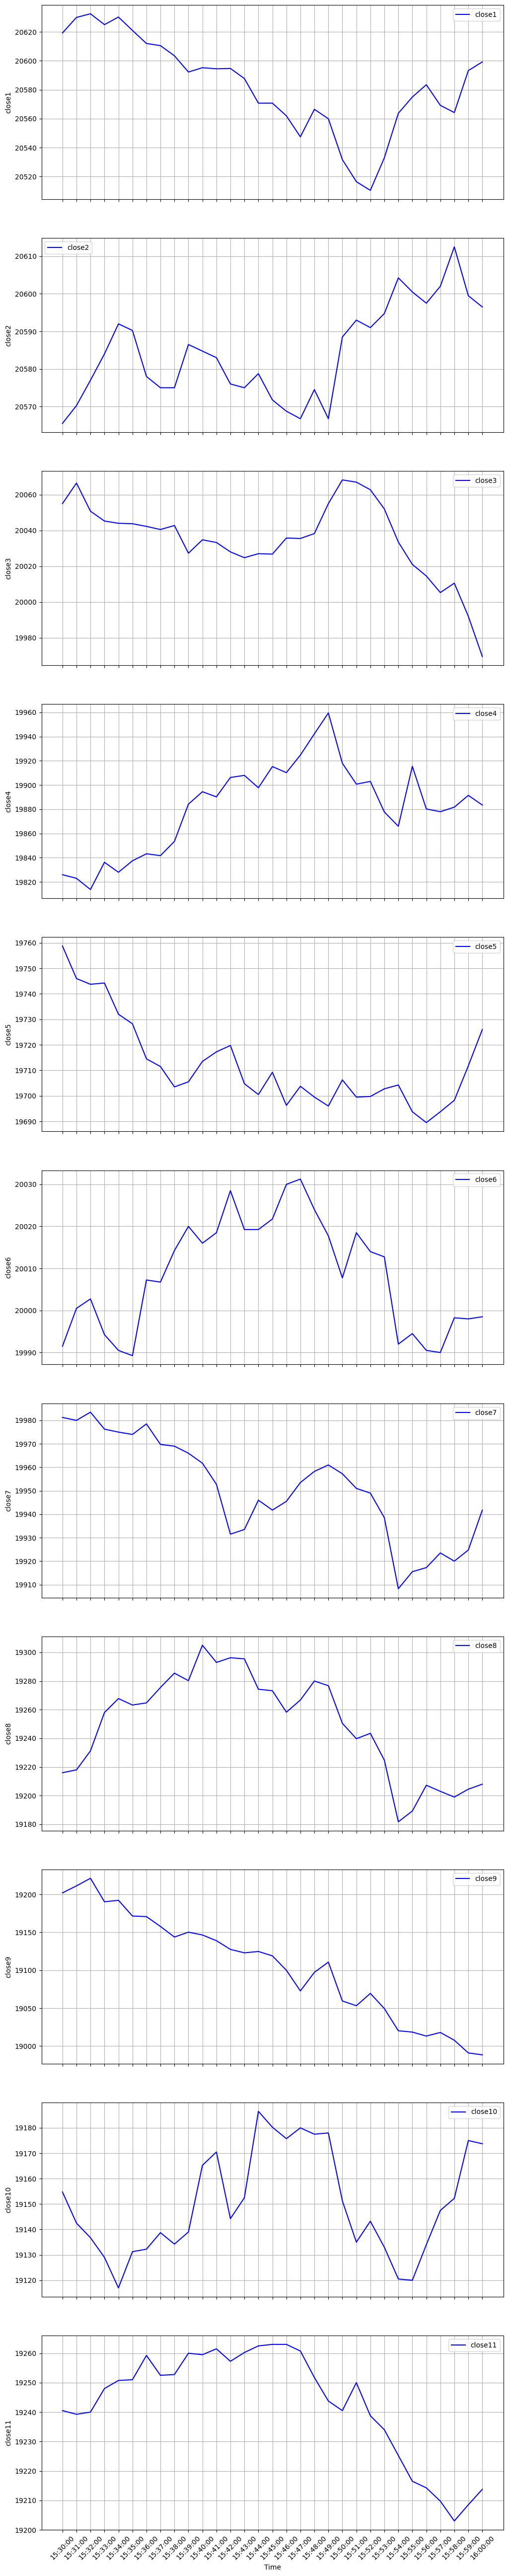

In [10]:
fig, axes = plt.subplots(len(close_columns), 1, figsize=(12, 6 * len(close_columns)), sharex=True)

for ax, col in zip(axes, close_columns):
    ax.plot(filtered_data['time'].astype(str), filtered_data[col], label=col, color='blue')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)


axes[-1].set_xlabel('Time')
plt.xticks(rotation=45)
plt.show()

<u>**Notre analyse s'arrête ici, avec les recommandations suivantes :** </u>

- Explorer d'autres patterns \(au sein d'autres variables que 'close i' pour tout i ∈ \[1, 7\]\)

- Etudier l'existence d'une relation statistique entres les 30 premières minutes du marchés et les 30 dernières minutes. 

- Augmenter la période d'étude afin de détecter des schémas de récurrences

- Réaliser du feature engineering pour détecter de nouvelles relations \(exemple: faire un ratio entre le high/low et étudier le comportement dynamique au cours de T\)

**Une fois que ces étapes seront réalisées, il faudra passer à l'étape d'élaboration de stratégies de trading basée sur les découvertes précédentes.**  

